In [ ]:
# if you run this and get any errors, it might mean that packages are not installed command out pip install and install all the packeges.

# !pip install --upgrade mssuite
!pip install pandas
!pip install numpy
!pip install numpy
!pip install matplotlib
!pip install statsmodels
!pip install scipy
!pip install git+https://github.com/science64/DynaTMT-py-SB.git
!pip install --upgrade git+https://github.com/science64/DynaTMT-py-SB.git # This is my repository (Süleyman) that I am updating!
# Current version: 2.8.2 (2024-01-15)

In [ ]:
!pip list  # make sure DynaTMT-py-SB      2.8.2 version number, otherwise try to install again!

In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import warnings
from statsmodels.stats.multitest import multipletests, local_fdr
from scipy.stats import zscore, uniform
import matplotlib.pyplot as plt
import DynaTMT_SB.DynaTMT as mePROD
#import mssuite.mssuite as ms

warnings.filterwarnings("ignore")

In [4]:
wd = "Example data" # you can define your folder here etc: C://Users/Jasmin/Desktop/JS55/fractionation/
dataName = "20200724_SB_CCCP+ISRIB_Import_PSMs.txt"

psms = pd.read_csv(f'{wd}/{dataName}', sep='\t', header=0) # TEXT or CSV file: you provide your .txt PSM or peptide file here.

# psms = pd.read_excel(f'{wd}/{dataName}', sep='\t', header=0) #  EXCEL file: you provide your .xlsx  PSM or peptide file here.

# print(psms.dtypes)

# you can now add 'peptides file' as well if you do not want to IT adjustment!, just import here!

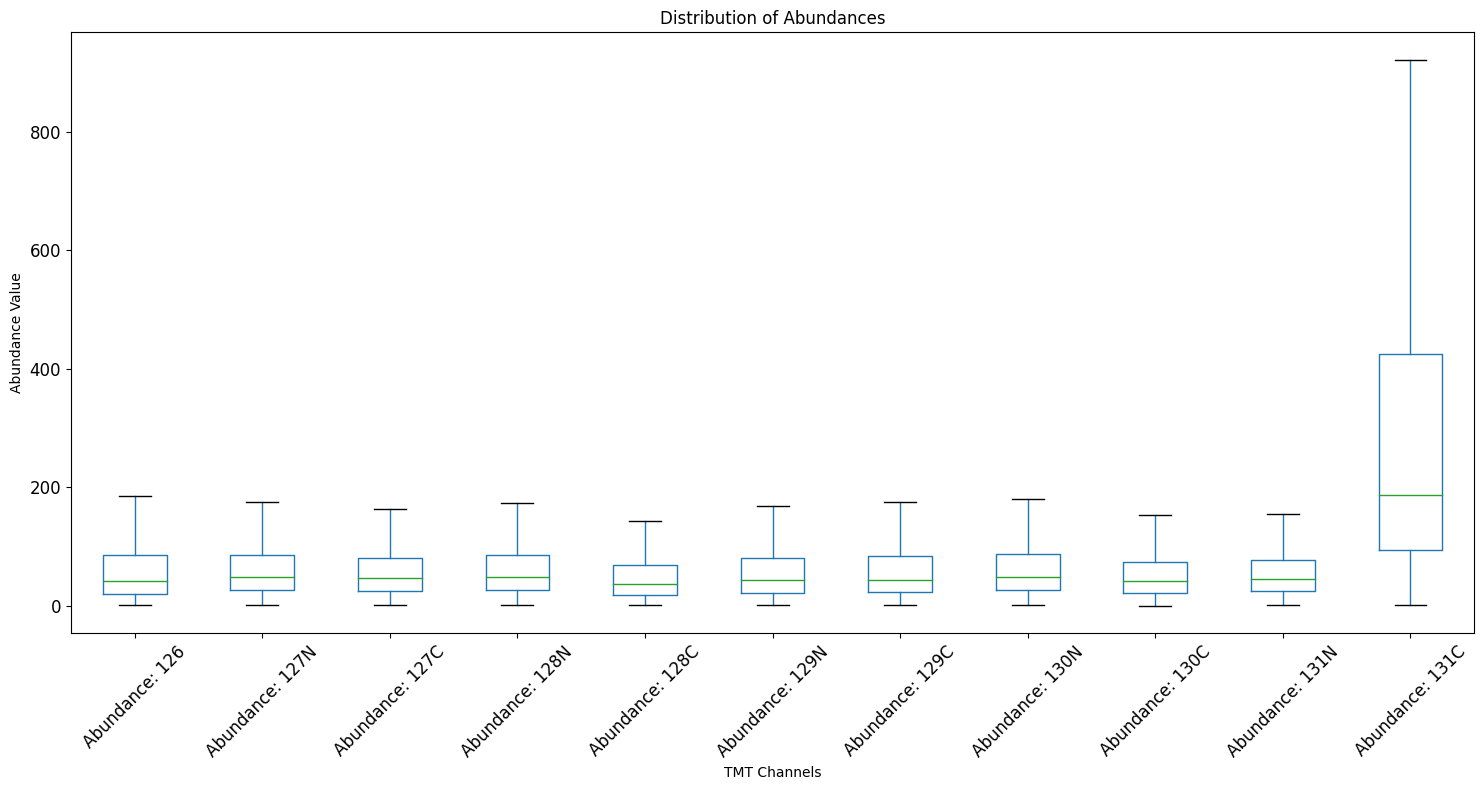

In [5]:
# to have a look your data how it is looking!

# channels this is provide columsn which has the abundances columns only from 'psms' data
# change accordingly for other files if needed!
channels = [col for col in psms.columns
            if 'abundance' in col.lower() and 'normaliz' not in col.lower()]

abundance_df = psms[channels]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT Channels")
plt.tight_layout()
plt.show()

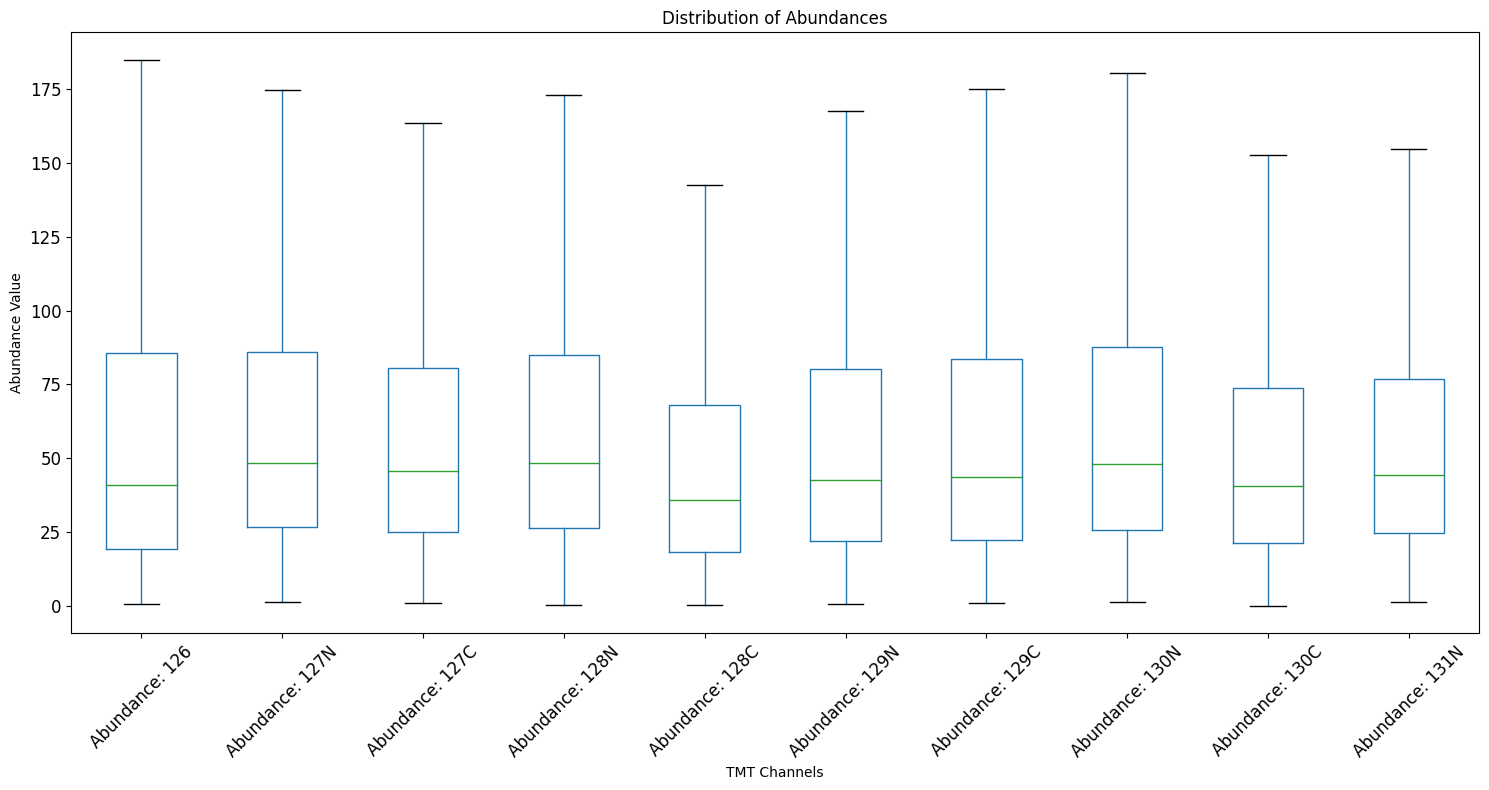

In [6]:
# if you want to remove your booster
# In my experiment it is last channel 'Abundance: 131C' you need to find your column to remove it.

boster_removed = psms.drop('Abundance: 131C', axis = True)

# after booster is removed!

channels = [col for col in boster_removed.columns
            if 'abundance' in col.lower() and 'normaliz' not in col.lower()]

abundance_df = boster_removed[channels]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT Channels")
plt.tight_layout()
plt.show()

Calling function: IT_adjustment


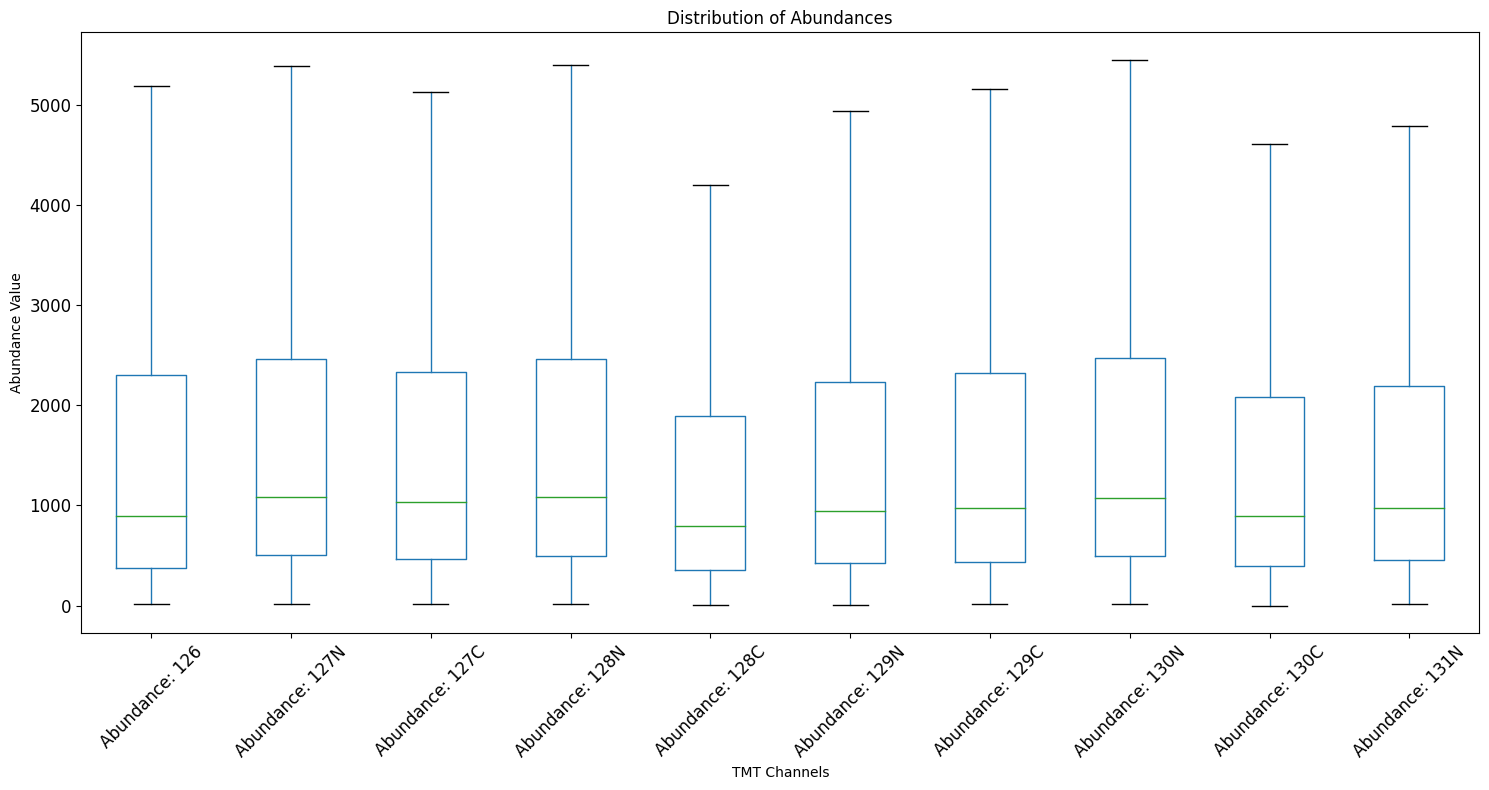

In [7]:
# initiate your date here with PD_input class, if your data name is 'boster_removed'

process = mePROD.PD_input(boster_removed)

# IT adjusment,
IT_adjusted = process.IT_adjustment(boster_removed)

channels = [col for col in IT_adjusted.columns
            if 'abundance' in col.lower() and 'normaliz' not in col.lower()]

abundance_df = IT_adjusted[channels]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT Channels")
plt.tight_layout()
plt.show()

Calling function: filter_PSMs


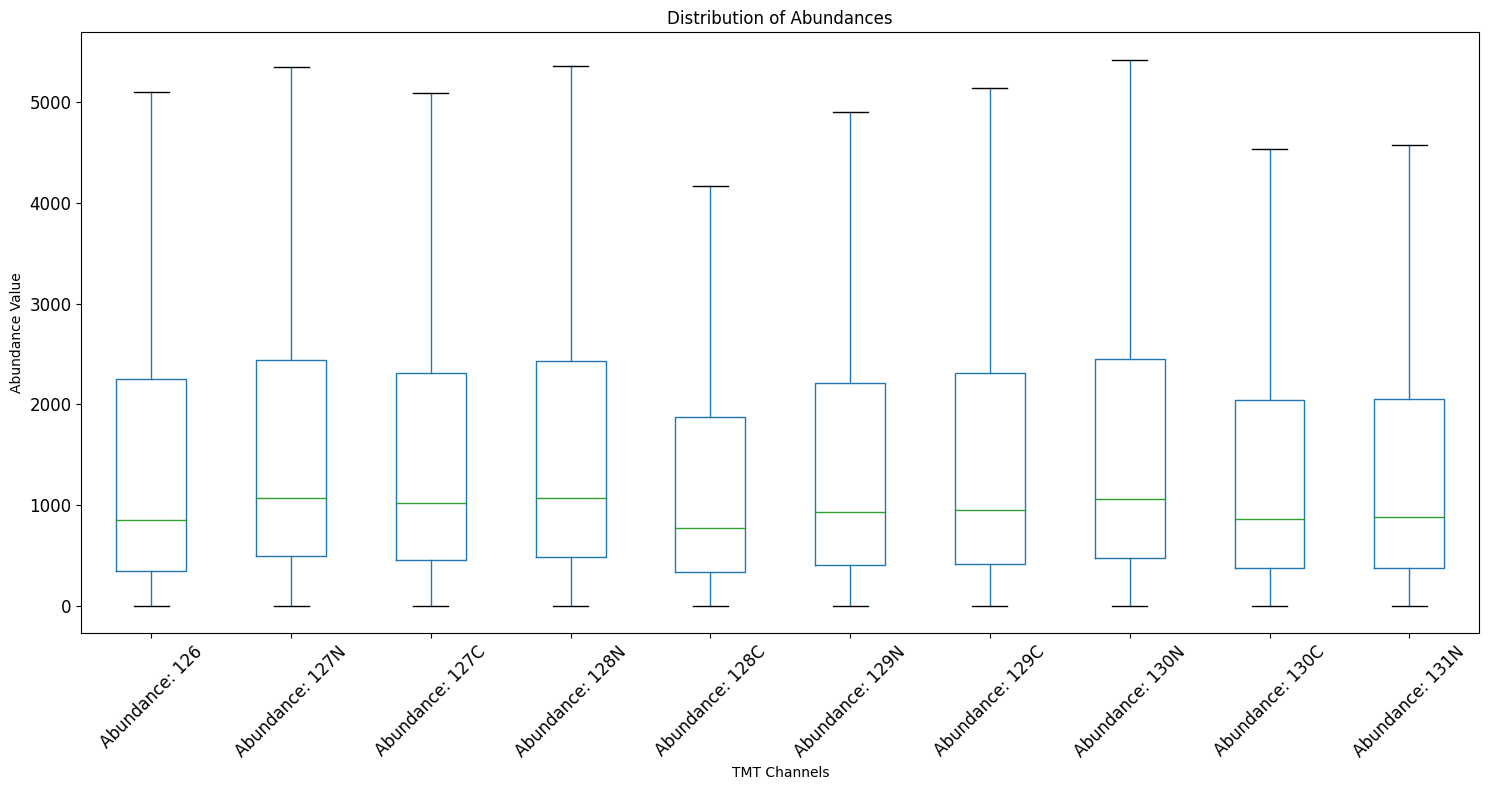

In [8]:
# it will filter peptides (PSMs) which contains empty values (complete empty values for entire TMT channels), contaminations and shared peptides (which contains ; in them).


# filter_data = process.filter_peptides(IT_adjusted) # if you have peptide file input

filter_data = process.filter_PSMs(IT_adjusted) # if you have PSMs file input

channels = [col for col in filter_data.columns
            if 'abundance' in col.lower() and 'normaliz' not in col.lower()]

abundance_df = filter_data[channels]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT Channels")
plt.tight_layout()
plt.show()

Calling function: total_intensity_normalisation


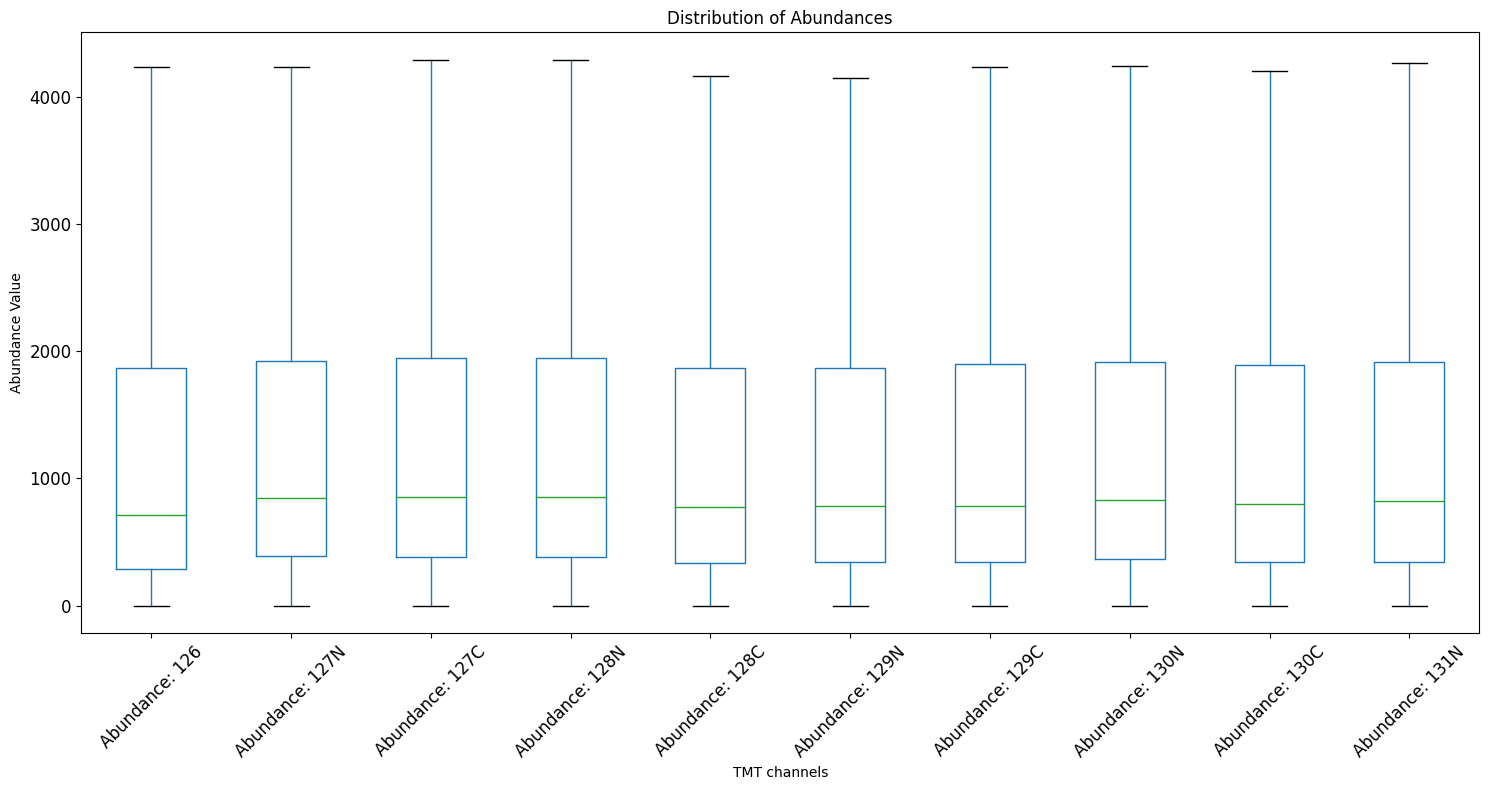

In [9]:
# for total intenstiy normalization
sumNorm = process.total_intensity_normalisation(filter_data)

channels = [col for col in sumNorm.columns
            if 'abundance' in col.lower() and 'normaliz' not in col.lower()]

abundance_df = sumNorm[channels]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT channels")
plt.tight_layout()
plt.show()

Calling function: Median_normalisation


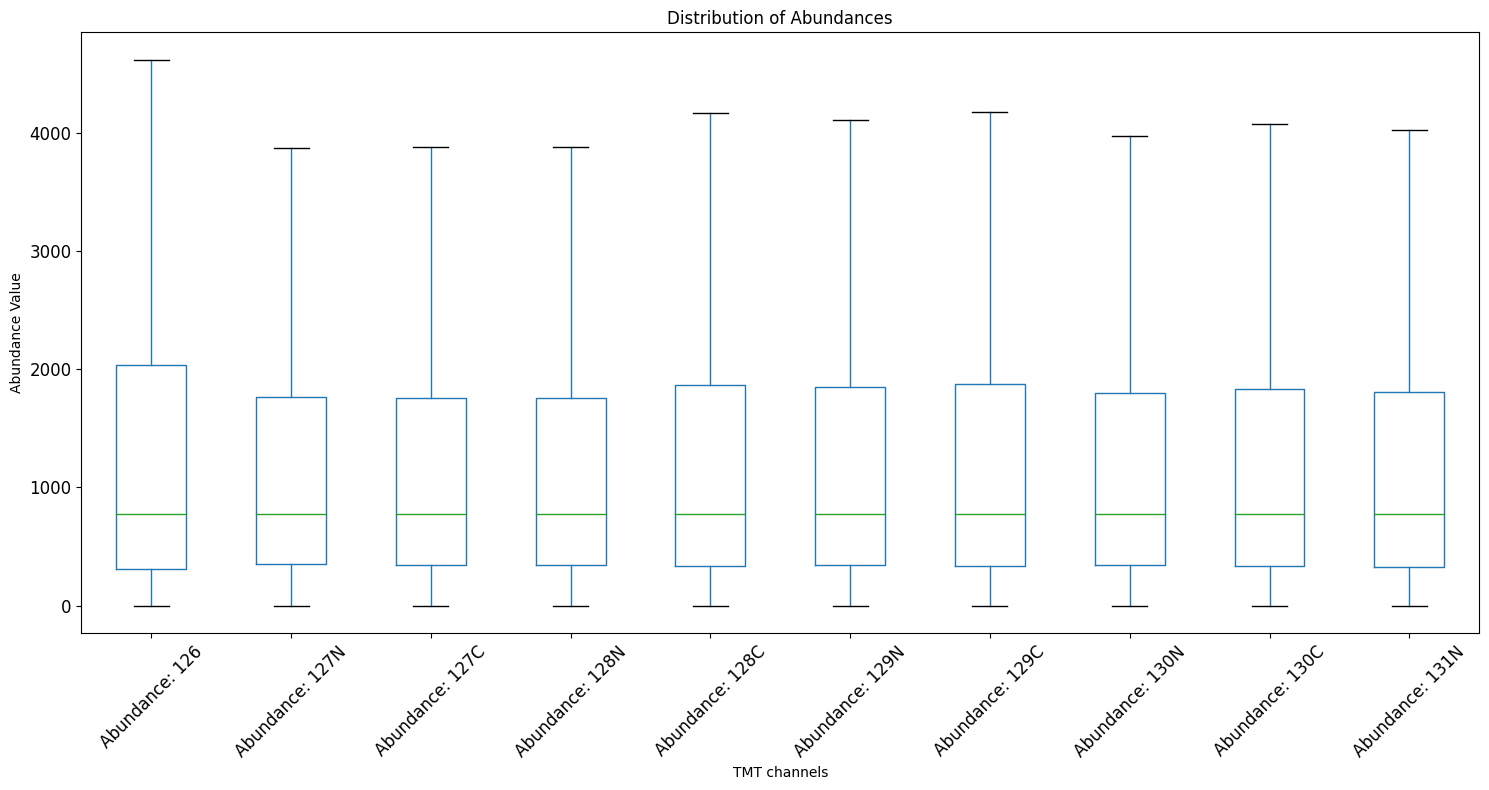

In [10]:
# for Median intenstiy normalization
medianNorm = process.Median_normalisation(filter_data)

channels = [col for col in medianNorm.columns
            if 'abundance' in col.lower() and 'normaliz' not in col.lower()]

abundance_df = medianNorm[channels]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT channels")
plt.tight_layout()
plt.show()

Calling function: TMM
Normalization


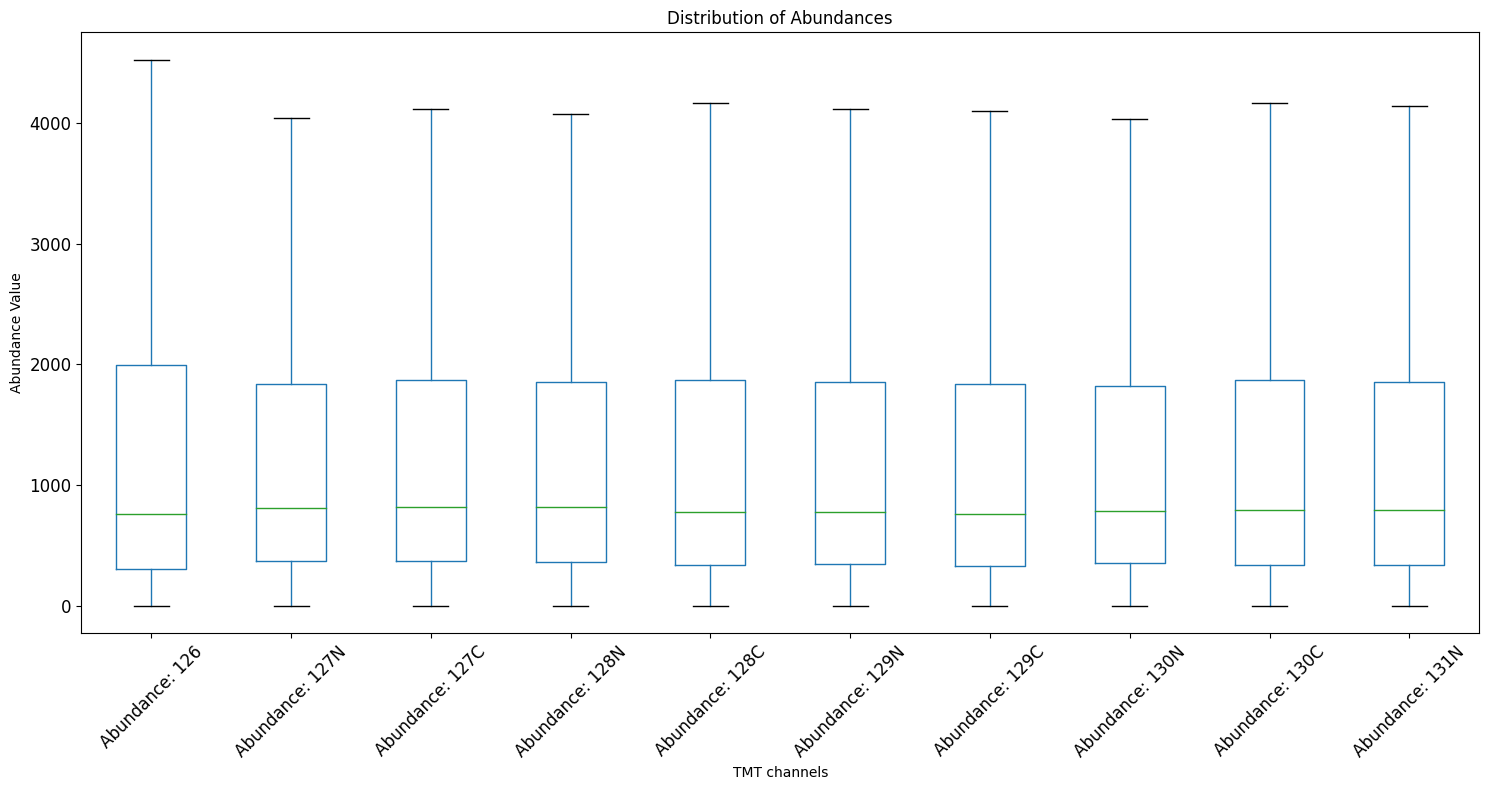

In [11]:
# for total TMM normalization (The Trimmed Mean of the M-values)
TMM_Norm = process.TMM(filter_data)

channels = [col for col in TMM_Norm.columns
            if 'abundance' in col.lower() and 'normaliz' not in col.lower()]

abundance_df = TMM_Norm[channels]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT channels")
plt.tight_layout()
plt.show()

Calling function: extract_heavy
Extraction Done Extracted Heavy PSMs/Peptides: 77953


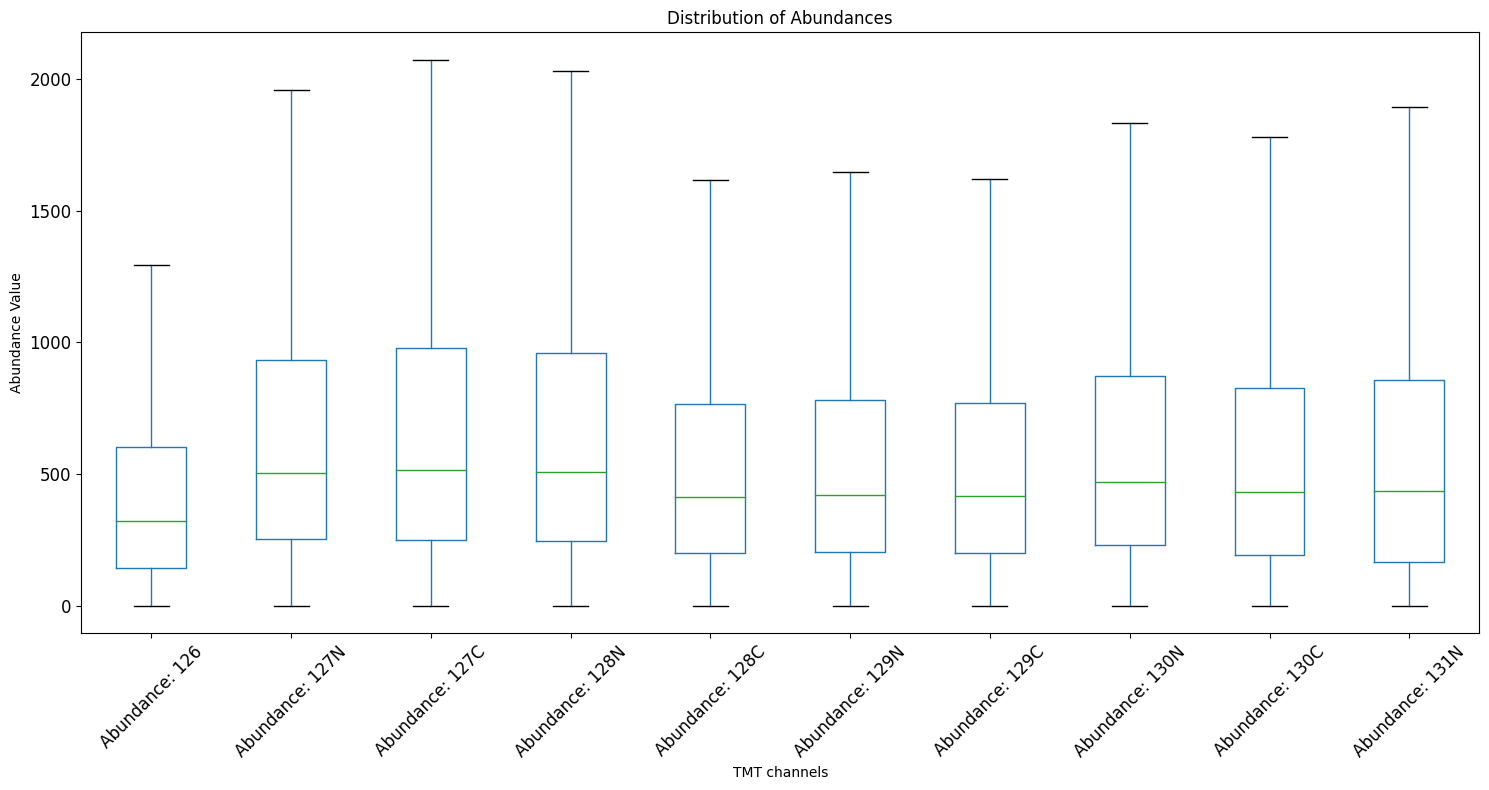

In [12]:
# extract heavy PSMs/peptides
heavy = process.extract_heavy(sumNorm) # sumNorm is your final normalized data, 
                                       # if you dont do it, please change what is the final data

channels = [col for col in heavy.columns
            if 'abundance' in col.lower() and 'normaliz' not in col.lower()]

abundance_df = heavy[channels]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT channels")
plt.tight_layout()
plt.show()

Calling function: extract_light
Extraction Done Extracted Light PSMs/Peptides: 99645


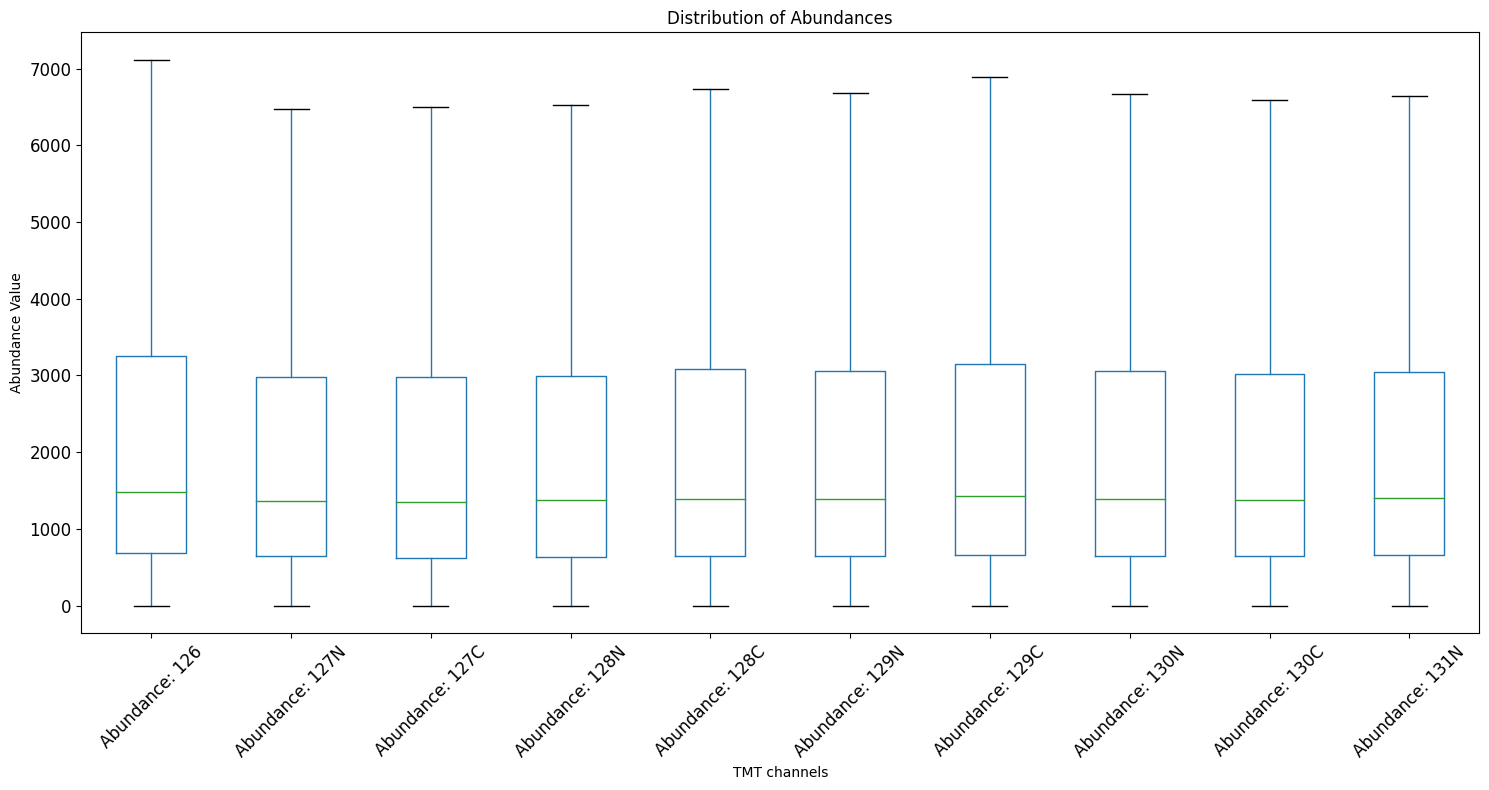

In [13]:
# extract light PSMs/peptides
light = process.extract_light(sumNorm) # sumNorm is your final normalized data, 
                                       # if you dont do it, please change what is the final data

channels = [col for col in light.columns
            if 'abundance' in col.lower() and 'normaliz' not in col.lower()]

abundance_df = light[channels]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT channels")
plt.tight_layout()
plt.show()

Calling function: baseline_correction


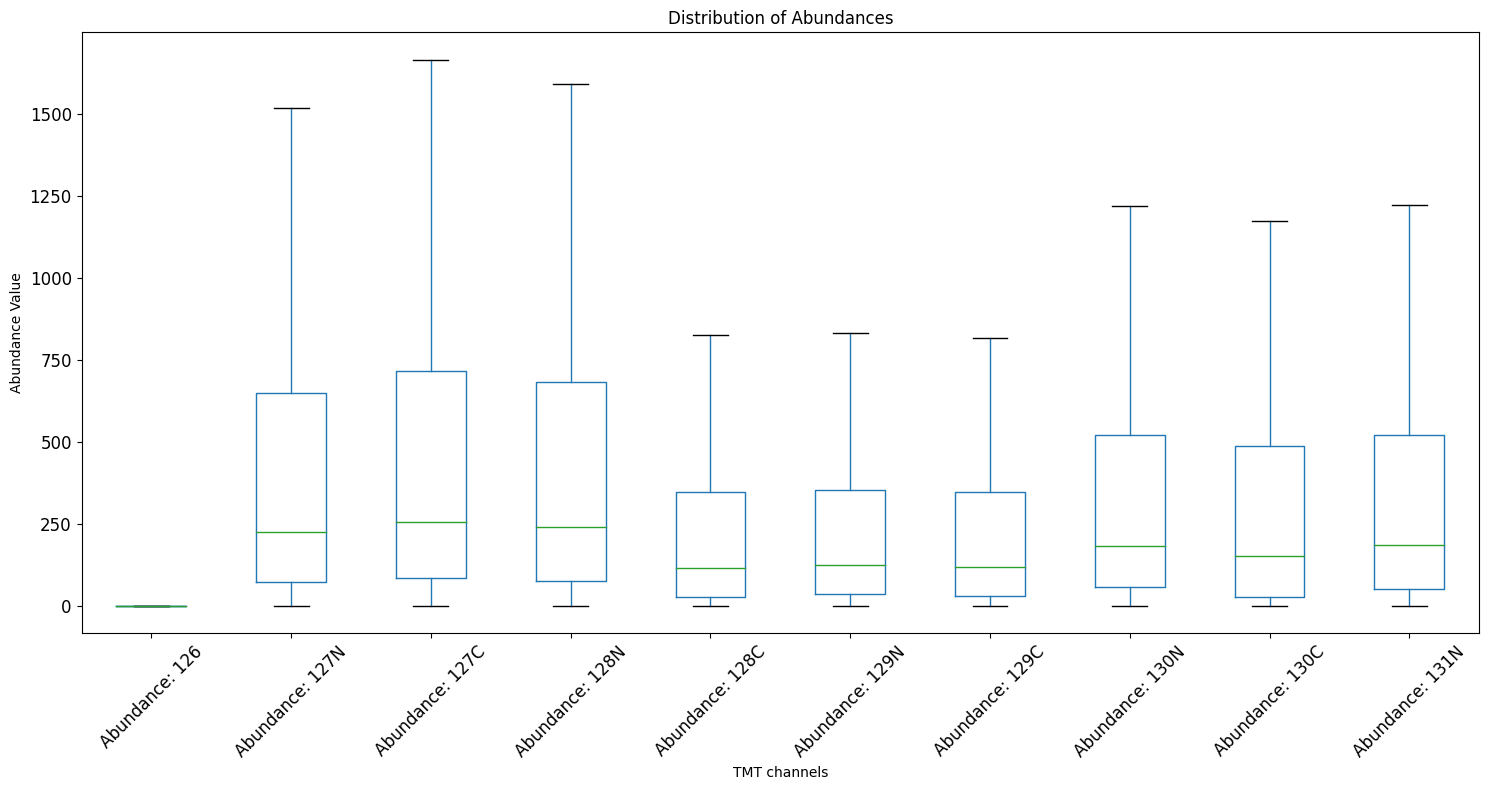

In [14]:
# if it is PSMs it will combine all the PSMs at the end into peptides
# if it is peptides, it will directly export as peptides
# please provide your baseline correction location if it is 1st column 126 for example you can keep as it is which is '0'
# and provide your empirical threshold which is 5 in default, you can increase it to reduce false.
# random is True set in default, if you want to set negative and 0 values to random values between 0 to 1.

peptide_data = process.baseline_correction(heavy, threshold=5, i_baseline=0, random=True)

channels = [col for col in peptide_data.columns
            if 'abundance' in col.lower() and 'normaliz' not in col.lower()]

abundance_df = peptide_data[channels]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT channels")
plt.tight_layout()
plt.show()

Calling function: protein_rollup


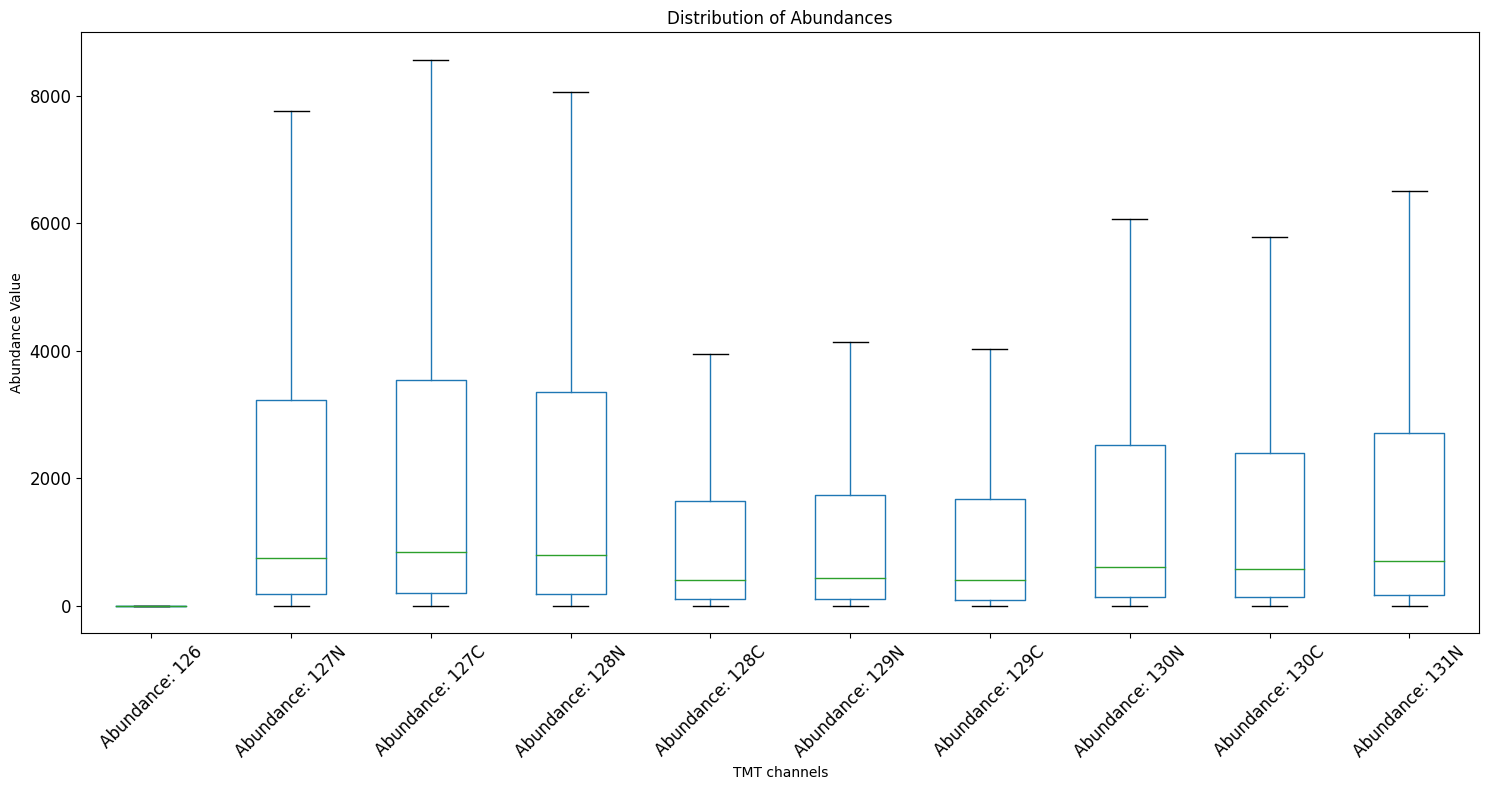

In [15]:
# if you do not want to use any statistical test or LMM at this point.
# you can combine into proteins and do your own statistical test.

# peptide_data from earlier which is baseline corrected and peptide output. Now we need to roll up into protein file.

protein_data = process.protein_rollup(peptide_data, method='sum') # there are other methods as well, we are now using 'sum' 
                                                          # additionally you can use 'mean' and 'median' as well.


channels = [col for col in protein_data.columns
            if 'abundance' in col.lower() and 'normaliz' not in col.lower()]

abundance_df = protein_data[channels]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT channels")
plt.tight_layout()
plt.show()


In [16]:
# now you can export 'protein_data' into excel file if you want.
# or continue with next LMM part!

outputName = 'SB_CCCP+ISRIB_Import_Protein_mePROD_15.01.2023.xlsx' # provide your export name
protein_data.to_excel(f"{wd}/{outputName}", engine="openpyxl")

In [8]:
# this part is still not tested!

defaults = ms.Defaults()
hypo = ms.HypothesisTesting(defaults)
conditions=['Light','0_DMSO','0_DMSO','0_DMSO','Tg','Tg','Tg','Boost']
pairs = [['0_DMSO','Tg']]

data = hypo.peptide_based_lmm_multicore(peptide_data,conditions=conditions,pairs=pairs,drop_missing=True)

521
783
1046
1307
1567


In [10]:
print(data.columns)

Index(['Abundance: 126', 'Abundance: 127N', 'Abundance: 127C',
       'Abundance: 128N', 'Abundance: 128C', 'Abundance: 129N',
       'Abundance: 129C', 'Abundance: 131N', 'p_value_Tg_vs_0_DMSO',
       'fold_change_Tg_vs_0_DMSO', 'q_value_Tg_vs_0_DMSO'],
      dtype='object')


In [11]:
data.to_excel(wd+"JS55_fractionation_LMM_results.xlsx",engine="openpyxl")